# MobileNetV2 model Training

#### Images sorting 

In [ ]:
import os
import shutil
import csv

source_root = '/content/drive/MyDrive/Dataset_masters/dataset_images'
target_root = '/content/drive/MyDrive/Dataset_masters/final_dataset'
csv_path = '/content/drive/MyDrive/Dataset_masters/ads_details.csv'

price_categories = {
    "0-5000000": (0, 5000000),
    "5000000-10000000": (5000000, 10000000),
    "10000000-15000000": (10000000, 15000000),
    "15000000-20000000": (15000000, 20000000),
    "20000000-inf": (20000000, float('inf')),
}


# Create target directories if they don't exist
for category in price_categories.keys():
    os.makedirs(os.path.join(target_root, category), exist_ok=True)

# Function to copy ad folder to the correct price category directory
def copy_ad_folder(ad_url, ad_folder_name, price):
    # Determine price category
    for category, (low, high) in price_categories.items():
        if low <= price < high:
            target_dir = os.path.join(target_root, category, ad_folder_name)
            if not os.path.exists(target_dir):
                os.makedirs(target_dir, exist_ok=True)
            source_dir = os.path.join(source_root, ad_folder_name)
            if os.path.exists(source_dir):
                # Copy each file from the source directory to the target directory
                for file_name in os.listdir(source_dir):
                    source_file = os.path.join(source_dir, file_name)
                    target_file = os.path.join(target_dir, file_name)
                    shutil.copy2(source_file, target_file)
                print(f"Copied {source_dir} to {target_dir}")
            else:
                print(f"Source directory does not exist: {source_dir}")
            break

# Process the CSV file and copy folders
with open(csv_path, mode='r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    for row in reader:
        price_str = row['Price'].replace('₽', '').replace('\xa0', '')
        try:
            price = float(price_str)
            ad_folder_name = row['Local Folder'].split('/')[-1]
            copy_ad_folder(row['Ad URL'], ad_folder_name, price)
        except ValueError as e:
            print(f"Error processing price '{price_str}' for ad: {row['Ad URL']}")


Copied /content/drive/MyDrive/Dataset_masters/dataset_images/3-к. квартира, 101 м², 5-8 эт. to /content/drive/MyDrive/Dataset_masters/final_dataset/20000000-inf/3-к. квартира, 101 м², 5-8 эт.
Copied /content/drive/MyDrive/Dataset_masters/dataset_images/1-к. квартира, 33,3 м², 10-12 эт. to /content/drive/MyDrive/Dataset_masters/final_dataset/5000000-10000000/1-к. квартира, 33,3 м², 10-12 эт.
Copied /content/drive/MyDrive/Dataset_masters/dataset_images/Квартира-студия, 20,4 м², 14-16 эт. to /content/drive/MyDrive/Dataset_masters/final_dataset/0-5000000/Квартира-студия, 20,4 м², 14-16 эт.
Copied /content/drive/MyDrive/Dataset_masters/dataset_images/3-к. квартира, 68,5 м², 4-6 эт. to /content/drive/MyDrive/Dataset_masters/final_dataset/5000000-10000000/3-к. квартира, 68,5 м², 4-6 эт.
Copied /content/drive/MyDrive/Dataset_masters/dataset_images/Квартира-студия, 24,4 м², 2-5 эт. to /content/drive/MyDrive/Dataset_masters/final_dataset/0-5000000/Квартира-студия, 24,4 м², 2-5 эт.
Copied /conten

In [ ]:
! pip install pillow

#### Organise dataset

In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path to the dataset
dataset_path = 'dataset'
test_dataset_path = 'test_dataset_processed'

# Ensure the test dataset path exists
os.makedirs(test_dataset_path, exist_ok=True)

# Get all categories from the dataset
categories = [name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))]

# For each category, move 10% of the ads to the test dataset
for category in categories:
    category_path = os.path.join(dataset_path, category)
    test_category_path = os.path.join(test_dataset_path, category)
    os.makedirs(test_category_path, exist_ok=True)

    # List all ads in the category
    ad_folders = [name for name in os.listdir(category_path) if os.path.isdir(os.path.join(category_path, name))]

    # Split ads into training and test sets (90% train, 10% test)
    _, test_ads = train_test_split(ad_folders, test_size=0.1, random_state=42)

    # Move the selected ads to the test dataset
    for ad in test_ads:
        source_ad_path = os.path.join(category_path, ad)
        destination_ad_path = os.path.join(test_category_path, ad)

        # Use shutil.move to move the folders
        shutil.move(source_ad_path, destination_ad_path)
        print(f"Moved {source_ad_path} to {destination_ad_path}")


Moved dataset\0-5000000\2-к. квартира, 51 м², 5-5 эт to test_dataset_processed\0-5000000\2-к. квартира, 51 м², 5-5 эт
Moved dataset\0-5000000\3-к. квартира, 72,3 м², 9-9 эт to test_dataset_processed\0-5000000\3-к. квартира, 72,3 м², 9-9 эт
Moved dataset\0-5000000\1-к. квартира, 30 м², 2-5 эт to test_dataset_processed\0-5000000\1-к. квартира, 30 м², 2-5 эт
Moved dataset\0-5000000\2-к. квартира, 59,6 м², 1-5 эт to test_dataset_processed\0-5000000\2-к. квартира, 59,6 м², 1-5 эт
Moved dataset\0-5000000\2-к. квартира, 52,2 м², 5-5 эт to test_dataset_processed\0-5000000\2-к. квартира, 52,2 м², 5-5 эт
Moved dataset\0-5000000\3-к. квартира, 57,1 м², 10-10 эт to test_dataset_processed\0-5000000\3-к. квартира, 57,1 м², 10-10 эт
Moved dataset\0-5000000\4-к. квартира, 60,3 м², 3-5 эт to test_dataset_processed\0-5000000\4-к. квартира, 60,3 м², 3-5 эт
Moved dataset\0-5000000\2-к. квартира, 61,2 м², 13-16 эт to test_dataset_processed\0-5000000\2-к. квартира, 61,2 м², 13-16 эт
Moved dataset\0-5000000\

#### Pre-process Dataset


In [1]:

import os
from PIL import Image, ImageOps
import numpy as np

source_dir = 'final_dataset'
target_dir = 'preprocessed_dataset'
desired_size = (224, 224)

def preprocess_and_save_images(source_path, target_path):
    if not os.path.exists(target_path):
        os.makedirs(target_path)
    for subdir, dirs, files in os.walk(source_path):
        for file in files:
            # Construct the full path to the image
            file_path = os.path.join(subdir, file)
            # Preprocess the image
            image = Image.open(file_path)
            # Apply padding and resizing
            image = ImageOps.pad(image, desired_size, method=Image.Resampling.LANCZOS, color=(0, 0, 0))
            # Construct the target path
            rel_path = os.path.relpath(file_path, source_path)
            target_file_path = os.path.join(target_path, rel_path)
            # Create directory if it does not exist
            os.makedirs(os.path.dirname(target_file_path), exist_ok=True)
            # Save the preprocessed image
            image.save(target_file_path)

# Run preprocessing
preprocess_and_save_images(source_dir, target_dir)




#### ImageDataGenerator and Data Augumentation

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32  # Define the batch size
desired_size = (224, 224)


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1
)


# Adjust the directory paths to the preprocessed dataset
train_generator = train_datagen.flow_from_directory(
    directory='dataset',
    target_size=desired_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    directory='dataset',
    target_size=desired_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle= False
)


Found 8152 images belonging to 2 classes.
Found 905 images belonging to 2 classes.


In [9]:
import tensorflow as tf
print(tf.__version__)

2.15.0


#### Model definination

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

# Load pre-trained MobileNetV2 model without top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of the MobileNetV2 base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)  # Batch Normalization after the dense layer
x = Dropout(0.2)(x)  # Dropout layer with 20% dropout rate
predictions = Dense(2, activation='softmax')(x)  # Assuming 2 classes for your dataset

# Construct the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Adjust the learning rate
initial_learning_rate = 0.001

# Compile the model with the adjusted learning rate
model.compile(optimizer=Adam(learning_rate=initial_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Print the model summary to see its structure and number of parameters
model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [32]:
import tempfile
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

tmpdir = tempfile.mkdtemp()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min', restore_best_weights=True)
# model_checkpoint = ModelCheckpoint('best_model_sofarl_2_15_9th_trial.keras', monitor='val_loss', save_best_only=True, mode='min')
model_checkpoint = ModelCheckpoint('my_model.keras', monitor='val_loss', save_best_only=True, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001, verbose=1)

# Assuming base_model has been defined earlier in your script
# Unfreeze some top layers of the base model
base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Continue training
model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

# Save the model

model.save('model.keras')


Epoch 1/10
255/255 [==============================] - 118s 453ms/step - loss: 0.2411 - accuracy: 0.8945 - val_loss: 0.3617 - val_accuracy: 0.8685 - lr: 1.0000e-05
Epoch 2/10
255/255 [==============================] - 114s 446ms/step - loss: 0.2393 - accuracy: 0.8970 - val_loss: 0.3676 - val_accuracy: 0.8508 - lr: 1.0000e-05
Epoch 3/10
255/255 [==============================] - 114s 448ms/step - loss: 0.2482 - accuracy: 0.8950 - val_loss: 0.3707 - val_accuracy: 0.8586 - lr: 1.0000e-05
Epoch 4/10
255/255 [==============================] - 115s 450ms/step - loss: 0.2417 - accuracy: 0.8965 - val_loss: 0.3697 - val_accuracy: 0.8497 - lr: 1.0000e-05
Epoch 4: early stopping


#### Load Model for testing

In [1]:
from tensorflow.keras.models import load_model

# Assuming your model is saved under 'best_model.keras'
model = load_model('my_model.keras')


#### Convert the SavedModel to TFLite format for easy use in mobile app

In [9]:
# Convert the SavedModel to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open ("model.tflite" , "wb") .write(tfmodel)


INFO:tensorflow:Assets written to: C:\Users\TAKUDZ~1\AppData\Local\Temp\tmpyt1q1_ux\assets


INFO:tensorflow:Assets written to: C:\Users\TAKUDZ~1\AppData\Local\Temp\tmpyt1q1_ux\assets


14114160

#### Test imaga data generation

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32  # Adjust to your preference
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory='test_dataset_processed',
    target_size=(224, 224),  # Ensure this matches your model's expected input
    batch_size=batch_size,
    class_mode='categorical',  # or 'binary' for binary classification
    shuffle=False  # Important for confusion matrix
)


Found 1090 images belonging to 2 classes.


#### Test Statistics

In [3]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")




35/35 [==============================] - 12s 230ms/step - loss: 0.3072 - accuracy: 0.8651
Test Loss: 0.30715522170066833
Test Accuracy: 0.8651376366615295


#### More statistics

35/35 [==============================] - 7s 182ms/step


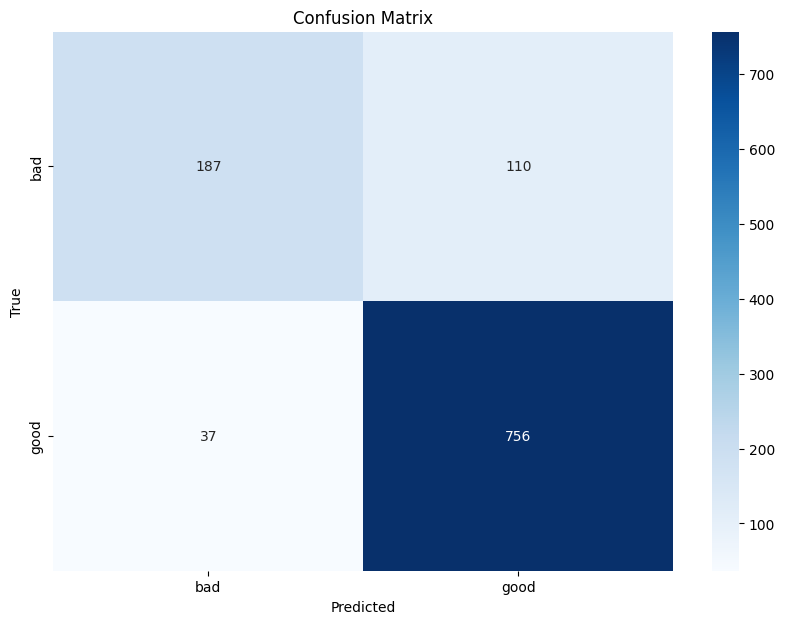

In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict classes
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#### More Statistics

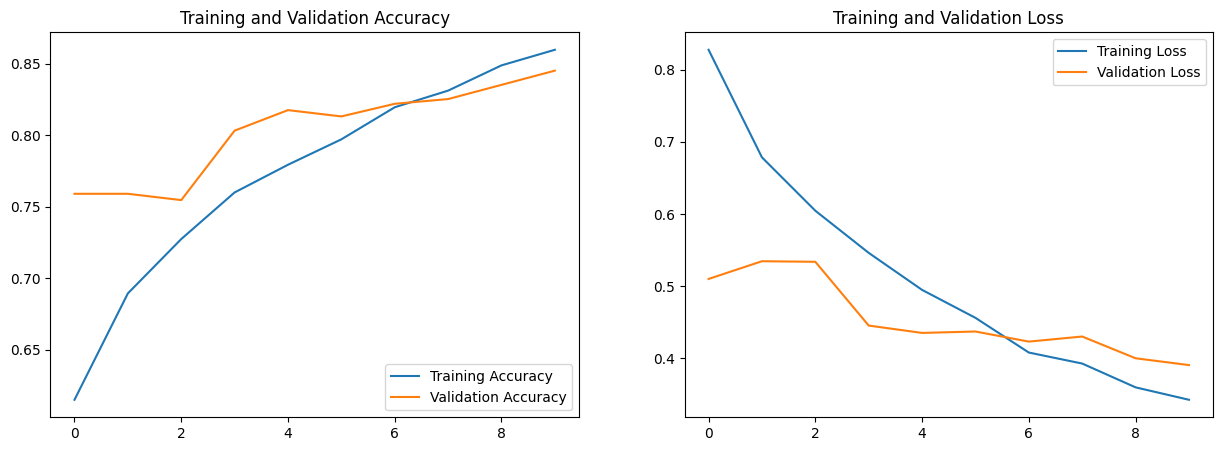

In [12]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# Assuming 'history' is the return value from model.fit()
plot_training_history(history)


#### Visual test result

c:\Users\TakudzwaMupanesure\source\repos\vkr_proj\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 326 variables whereas the saved optimizer has 122 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


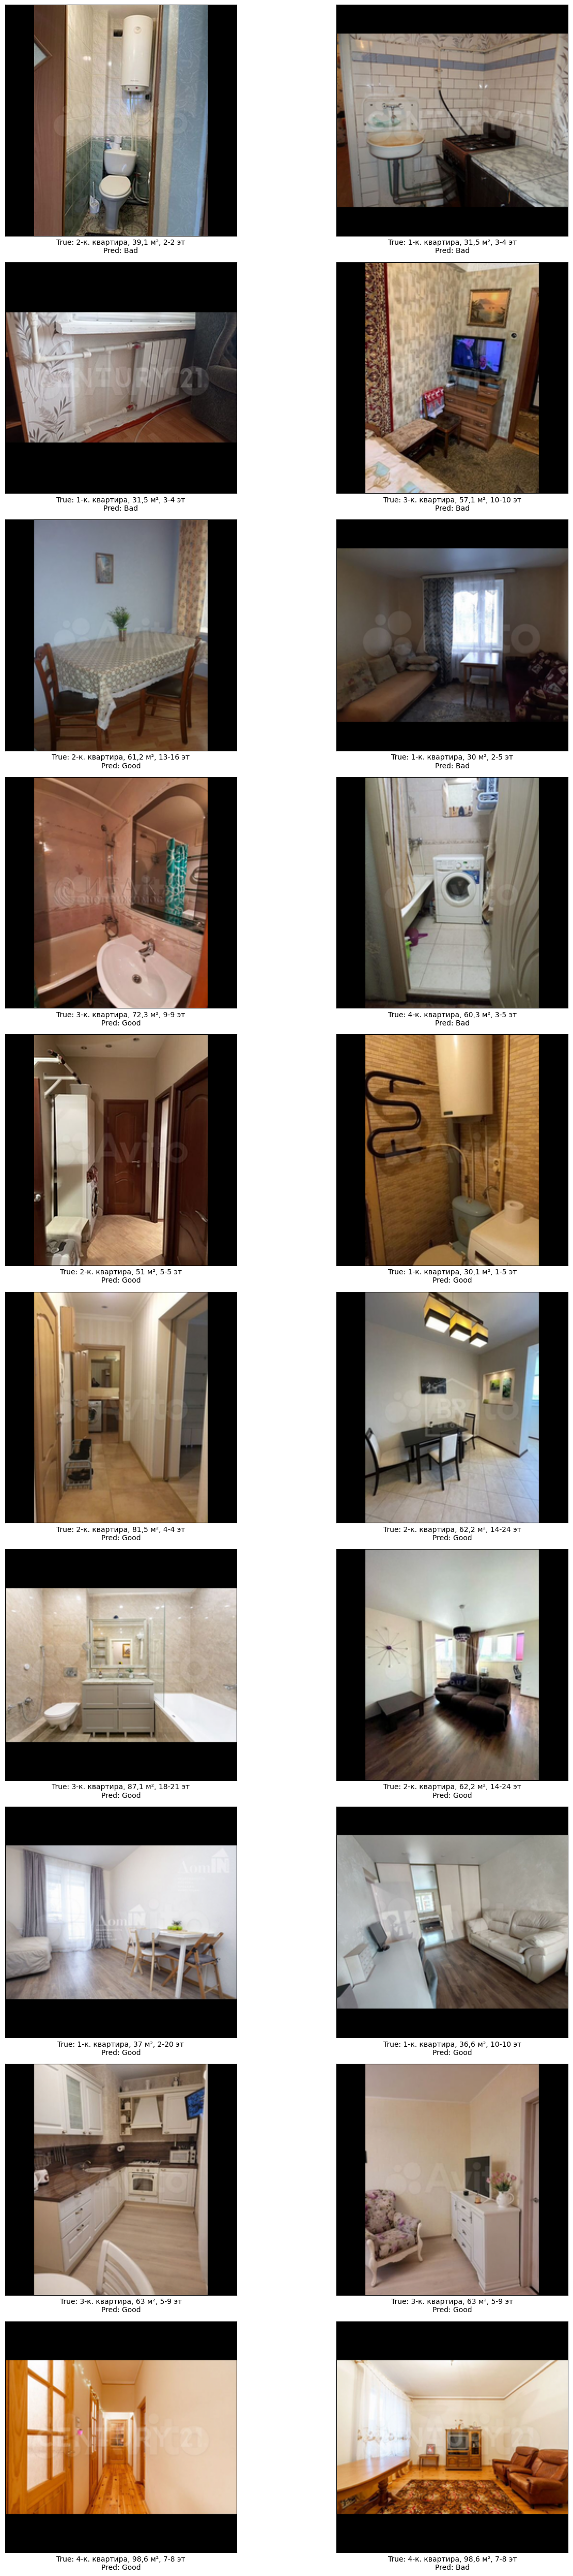

In [46]:
import os
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Assuming the model is saved and can be loaded
model = load_model('best_model_sofar.keras')

def load_and_prepare_image(image_path, target_size=(224, 224)):
    """Load an image from file and prepare it for prediction."""
    image = Image.open(image_path)
    image = image.resize(target_size)
    image_array = np.array(image) / 255.0  # Scale image
    return np.expand_dims(image_array, axis=0)  # Add batch dimension

def predict_and_display_images_from_folders(base_path, model, num_images=10):
    """Automatically select and display predictions for images from test dataset folders."""
    categories = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]
    selected_images = []
    for category in categories:
        # Fetch all png images from all subdirectories of the category
        image_paths = glob.glob(os.path.join(base_path, category, '**', '*.png'), recursive=True)
        if not image_paths:
            print(f"No images found in {os.path.join(base_path, category)}. Skipping this category.")
            continue
        # Ensure there are enough images to select from
        num_to_select = min(num_images // len(categories), len(image_paths))
        selected_images.extend(np.random.choice(image_paths, size=num_to_select, replace=False))

    plt.figure(figsize=(15, num_images // 2 * 5))
    for i, image_path in enumerate(selected_images):
        image = load_and_prepare_image(image_path)
        prediction = model.predict(image)
        predicted_class = np.argmax(prediction, axis=1)[0]
        true_label = os.path.basename(os.path.dirname(image_path))  # This gets the immediate parent directory name

        plt.subplot(len(selected_images) // 2, 2, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(np.squeeze(image), cmap='gray')
        plt.xlabel(f"True: {true_label}\nPred: {'Good' if predicted_class == 1 else 'Bad'}")
    plt.tight_layout()
    plt.show()

# Path to your test dataset
test_dataset_path = 'test_dataset_processed'
predict_and_display_images_from_folders(test_dataset_path, model, num_images=20)
